# Save random arrays

In [2]:
import numpy as np
import os

# Create directory if it doesn't exist
save_dir = 'random_arrays'
os.makedirs(save_dir, exist_ok=True)

# Generate and save 5 arrays
for i in range(1):
    # Generate 20x20 random array
    arr = np.random.randint(0, 801, size=(20, 20))
    
    # # Save as .npy (binary format)
    # npy_path = os.path.join(save_dir, f'array_{i+1}.npy')
    # np.save(npy_path, arr)
    
    # Save as .txt (human readable)
    txt_path = os.path.join(save_dir, f'array_{i+1}.txt')
    np.savetxt(txt_path, arr, fmt='%d', delimiter=',')

print(f"Arrays saved in {os.path.abspath(save_dir)}")

Arrays saved in d:\Ace\Haegl init\random_arrays


# full square

In [16]:
import numpy as np
import altair as alt
import pandas as pd
import time
from IPython.display import display, clear_output

def load_arrays():
    arrays = []
    for i in range(1):
        arr = np.load(f'random_arrays/array_{i+1}.npy')
        arrays.append(arr)
    return arrays

def array_to_dataframe(arr):
    # Convert 2D array to long format DataFrame
    rows, cols = arr.shape
    df = pd.DataFrame([
        (i, j, arr[i, j])
        for i in range(rows)
        for j in range(cols)
    ], columns=['row', 'col', 'value'])
    return df

def create_heatmap(df):
    heatmap = alt.Chart(df).mark_rect().encode(
        x=alt.X('col:O', title=None),
        y=alt.Y('row:O', title=None),
        color=alt.Color('value:Q', scale=alt.Scale(scheme='viridis', domain=[0, 800]))
    ).properties(
        width=400,
        height=400,
        title='Array Heatmap'
    )
    return heatmap

def animate_heatmaps():
    arrays = load_arrays()
    
    for i in range(len(arrays)-1):
        df_current = array_to_dataframe(arrays[i])
        chart = create_heatmap(df_current)
        display(chart)
        time.sleep(0.25)  # 2 second delay
        clear_output(wait=True)
    
    # Display final array
    df_final = array_to_dataframe(arrays[-1])
    chart = create_heatmap(df_final)
    display(chart)

if __name__ == "__main__":
    animate_heatmaps()

alt.Chart(...)

# foot with strict boundry

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# Input array
original_array = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

# Randomly replace the 1s with random numbers
def randomize_array(arr):
    randomized = arr.copy()
    randomized[randomized == 1] = np.random.randint(0, 801, size=(randomized == 1).sum())
    return randomized

# Save and display the array
def process_array(arr, iteration, directory):
    # Randomize the array
    randomized_array = randomize_array(arr)
    
    # Save the array as .npy
    npy_file = os.path.join(directory, f"array_{iteration}.npy")
    np.save(npy_file, randomized_array)
    
    # # Save the array as .txt
    # txt_file = os.path.join(directory, f"array_iteration_{iteration}.txt")
    # np.savetxt(txt_file, randomized_array, fmt="%d")
    
    # # Display the heatmap
    # plt.figure(figsize=(6, 6))
    # plt.imshow(randomized_array, cmap="viridis", interpolation="nearest")
    # plt.colorbar(label="Value")
    # plt.title(f"Heatmap - Iteration {iteration}")
    # plt.xlabel("Column Index")
    # plt.ylabel("Row Index")
    # plt.show()

# Create a directory to store files
output_directory = "foot-array2"
os.makedirs(output_directory, exist_ok=True)

# Run multiple iterations
for i in range(20):  # Change the range for more iterations
    process_array(original_array, i + 1, output_directory)
    time.sleep(0.5)  # Pause between iterations


# without strict boundry

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import random

# Input array
original_array = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

# Randomly replace 1's and expand boundaries
def randomize_with_boundary(arr, extra_boxes=10):
    randomized = arr.copy()

    # Replace the 1's with random values
    randomized[randomized == 1] = np.random.randint(0, 801, size=(randomized == 1).sum())

    # Find the boundary cells
    boundary_cells = []
    rows, cols = arr.shape
    for i in range(rows):
        for j in range(cols):
            if arr[i, j] == 1:
                # Check 8 neighbors
                for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
                    ni, nj = i + di, j + dj
                    if 0 <= ni < rows and 0 <= nj < cols and arr[ni, nj] == 0:
                        boundary_cells.append((ni, nj))

    # Randomly select extra cells from the boundary
    extra_indices = random.sample(boundary_cells, min(extra_boxes, len(boundary_cells)))
    for idx in extra_indices:
        randomized[idx[0], idx[1]] = np.random.randint(0, 801)

    return randomized

# Save and display the array
def process_array(arr, iteration, directory):
    # Randomize the array with extra boundary boxes
    randomized_array = randomize_with_boundary(arr, extra_boxes=15)

    # Save the array as .npy
    npy_file = os.path.join(directory, f"array_{iteration}.npy")
    np.save(npy_file, randomized_array)

    # # Save the array as .txt
    # txt_file = os.path.join(directory, f"array_iteration_{iteration}.txt")
    # np.savetxt(txt_file, randomized_array, fmt="%d")

    # # Display the heatmap
    # plt.figure(figsize=(6, 6))
    # plt.imshow(randomized_array, cmap="viridis", interpolation="nearest")
    # plt.colorbar(label="Value")
    # plt.title(f"Heatmap - Iteration {iteration}")
    # plt.xlabel("Column Index")
    # plt.ylabel("Row Index")
    # plt.show()

# Create a directory to store files
output_directory = "foot-array"
os.makedirs(output_directory, exist_ok=True)

# Run multiple iterations
for i in range(20):  # Change the range for more iterations
    process_array(original_array, i + 1, output_directory)
    time.sleep(0.5)  # Pause between iterations


KeyboardInterrupt: 

# plotting

In [24]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os

class DynamicHeatmap:
    def __init__(self):
        self.arrays = []
        self.current_idx = 0
        self.frame_count = 0
        self.frames_between = 20
        self.anim = None  # Store animation object
        self.load_arrays()
        
    def load_arrays(self):
        for i in range(5):
            path = f'random_arrays/array_{i+1}.npy'
            if os.path.exists(path):
                self.arrays.append(np.load(path))
    
    def setup_animation(self):
        plt.close('all')
        self.fig, self.ax = plt.subplots(figsize=(10, 8))
        self.im = self.ax.imshow(
            self.arrays[0],
            cmap='viridis',
            interpolation='nearest',
            aspect='equal',
            vmin=0,
            vmax=800
        )
        plt.colorbar(self.im)
        
    def update(self, frame):
        current_array = self.arrays[frame % len(self.arrays)]
        self.im.set_array(current_array)
        self.ax.set_title(f'Array {(frame % len(self.arrays)) + 1}')
        return [self.im]
    
    def animate(self):
        self.setup_animation()
        self.anim = FuncAnimation(
            self.fig,
            self.update,
            frames=len(self.arrays) * self.frames_between,
            interval=50,
            blit=True,
            repeat=True
        )
        return self.anim  # Return animation object

# Create and store animation reference
viz = DynamicHeatmap()
anim = viz.animate()  # Store reference to prevent garbage collection
plt.show()

<IPython.core.display.Javascript object>

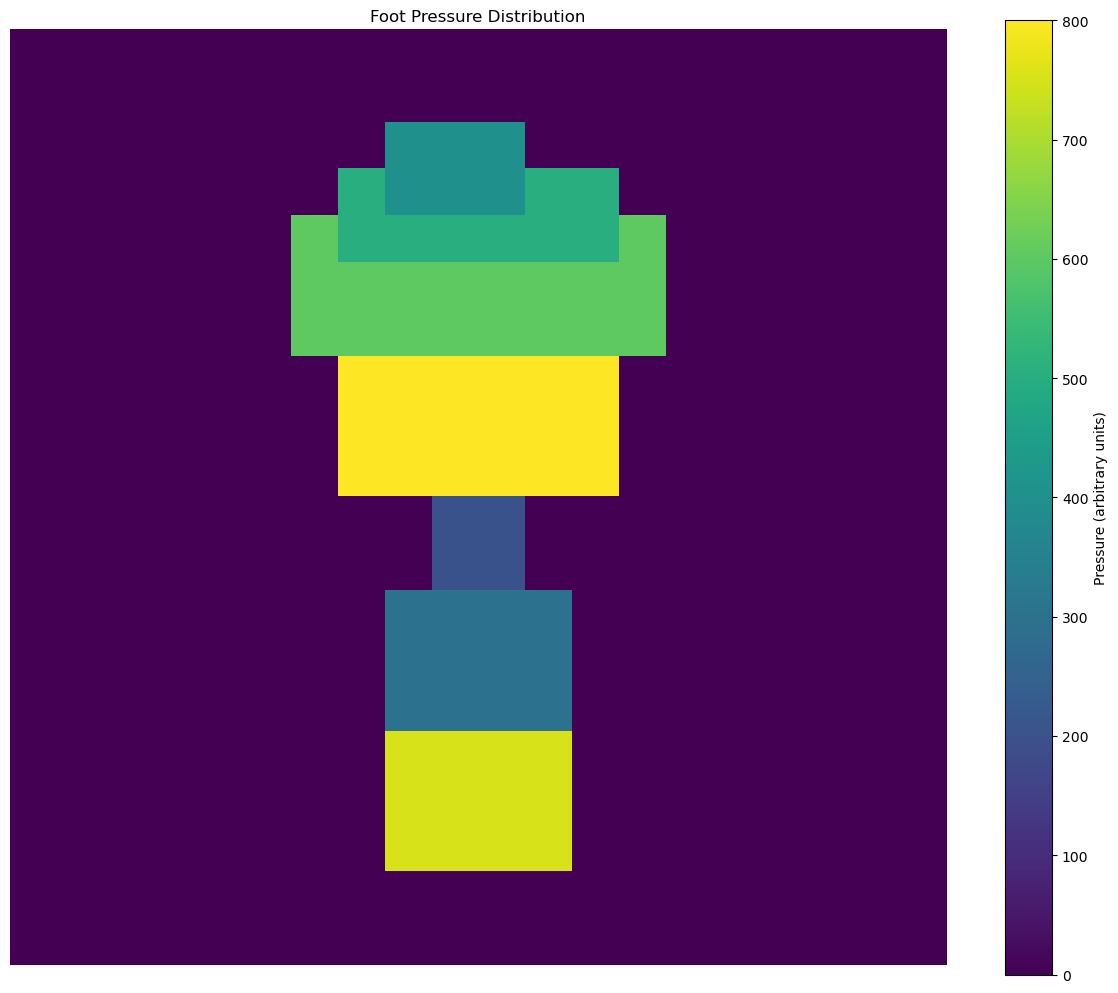

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def create_and_show_foot():
    # Create array
    foot = np.zeros((20, 20))
    
    # Define pressure zones
    foot[15:18, 8:12] = 750  # Heel
    foot[12:15, 8:12] = 300  # Arch
    foot[10:12, 9:11] = 200  # Mid-arch
    foot[7:10, 7:13] = 800   # Ball
    foot[4:7, 6:14] = 600    # Toes base
    foot[3:5, 7:13] = 500    # Toes middle
    foot[2:4, 8:11] = 400    # Toes tip
    
    # Setup visualization
    plt.figure(figsize=(12, 10))
    plt.imshow(foot, cmap='viridis')
    plt.colorbar(label='Pressure (arbitrary units)')
    plt.title('Foot Pressure Distribution')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

create_and_show_foot()